In [94]:
import numpy as np
import pandas as pd
import tensorflow as tf
import random
import matplotlib.pyplot as plt

In [7]:
print('Numpy version: {}'.format(np.__version__))
print('Pandas version: {}'.format(pd.__version__))
print('TensorFlow version: {}'.format(tf.__version__))


Numpy version: 1.19.5
Pandas version: 1.1.5
TensorFlow version: 2.5.0


In [60]:
# generate fake data
dates = pd.period_range('1/1/2018', freq='M', periods=36) # 3 years worth of months
random1 = [random.randint(1,100) for val in range(36)]
random2 = [random.randint(1,100) for val in range(36)]

In [62]:
df = pd.DataFrame(
    {
      'Date': dates,
     'Team1': random1,
     'Team2': random2,    
    }
)

In [64]:
df.head(5)

,Date,Team1,Team2
0,2018-01,88,93
1,2018-02,35,10
2,2018-03,92,33
3,2018-04,14,53
4,2018-05,27,26


In [65]:
# add difference
df['Difference'] = df['Team1'] - df['Team2']

In [67]:
df.head(5)

,Date,Team1,Team2,Difference
0,2018-01,88,93,-5
1,2018-02,35,10,25
2,2018-03,92,33,59
3,2018-04,14,53,-39
4,2018-05,27,26,1


In [73]:
# separate dfs into years
df2018 = df[df['Date'] < '2019-1-1'].copy()
df2019 = df[(df['Date'] > '2018-12-31') & (df['Date'] < '2020-1-1')].copy()
df2020 = df[(df['Date'] > '2019-12-31') & (df['Date'] < '2021-1-1')].copy()

In [74]:
df2018

,Date,Team1,Team2,Difference
0,2018-01,88,93,-5
1,2018-02,35,10,25
2,2018-03,92,33,59
3,2018-04,14,53,-39
4,2018-05,27,26,1
5,2018-06,34,2,32
6,2018-07,9,96,-87
7,2018-08,81,69,12
8,2018-09,74,99,-25
9,2018-10,68,49,19


In [75]:
df2019

,Date,Team1,Team2,Difference
12,2019-01,10,10,0
13,2019-02,28,52,-24
14,2019-03,83,79,4
15,2019-04,23,66,-43
16,2019-05,66,75,-9
17,2019-06,56,75,-19
18,2019-07,3,55,-52
19,2019-08,76,6,70
20,2019-09,48,46,2
21,2019-10,63,59,4


In [76]:
df2020

,Date,Team1,Team2,Difference
24,2020-01,29,39,-10
25,2020-02,26,90,-64
26,2020-03,77,89,-12
27,2020-04,64,83,-19
28,2020-05,31,1,30
29,2020-06,55,70,-15
30,2020-07,58,16,42
31,2020-08,87,39,48
32,2020-09,47,66,-19
33,2020-10,70,96,-26


In [90]:
# NN for Celsius -> Farenheit
model = tf.keras.Sequential(
    tf.keras.layers.Dense(units=1, input_shape=[1])
)
model.compile(
    loss='mean_squared_error',
    optimizer=tf.keras.optimizers.Adam(0.1)
)

In [91]:
# generate data
celsius = np.array([], float)
fahrenheit = np.array([], float)
for i in range(0, 100, 5):
  celsius = np.append(celsius, i)
  fahrenheit = np.append(fahrenheit, i*1.8+32)

print(celsius)
print(fahrenheit)

[ 0.  5. 10. 15. 20. 25. 30. 35. 40. 45. 50. 55. 60. 65. 70. 75. 80. 85.
 90. 95.]
[ 32.  41.  50.  59.  68.  77.  86.  95. 104. 113. 122. 131. 140. 149.
 158. 167. 176. 185. 194. 203.]


In [ ]:
# train NN
history = model.fit(celsius, fahrenheit, epochs=500, verbose=1)

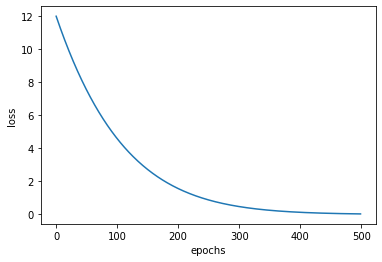

In [95]:
# plot loss
import matplotlib.pyplot as plt
plt.xlabel('epochs')
plt.ylabel('loss')
plt.plot(history.history['loss'])

In [99]:
# predict
test = [7, 23, 45]

for i in test:
  print('--- Test Value {} ---'.format(i))
  print('{} celsius is {} fahrenheit'.format(i, model.predict([i])))
  print('Actual: {}'.format(i*1.8+32))

--- Test Value 7 ---
7 celsius is [[44.30036]] fahrenheit
Actual: 44.6
--- Test Value 23 ---
23 celsius is [[73.18329]] fahrenheit
Actual: 73.4
--- Test Value 45 ---
45 celsius is [[112.89732]] fahrenheit
Actual: 113.0
